In [1]:
import sympy as sp
import numa as nm

### Jeden priklad rozne metody:

**Priklad 1:** Nájdite riešenie rovnice **x^2 + ln(x) = 10/x** na intervale **[0.1, 4]**

Urobme separaciu korenov a funkciu f(x) nakreslime na intervale [0.1, 4].

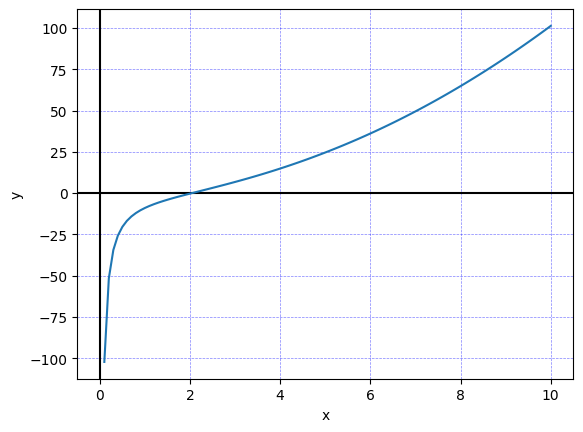

In [2]:
x = sp.Symbol('x')
f = x**2+sp.log(x)-10/x
nm.plot_fn(f, x, x_axis=(0.1, 10, 100))

Z obrazku nevieme odhadnut nasobnost korena, preto zobrazime f'(x). Preto nakreslime f'(x) na malom okoli bodu x=2 -> v okoli tohto budu by sa mal nachadzat koren. Ale z obrazku je vidno ze v okoli bodu 2.5 - 3 sa funkcia meni z konvexnej do konkavnej, pritomnost inflexneho budu.

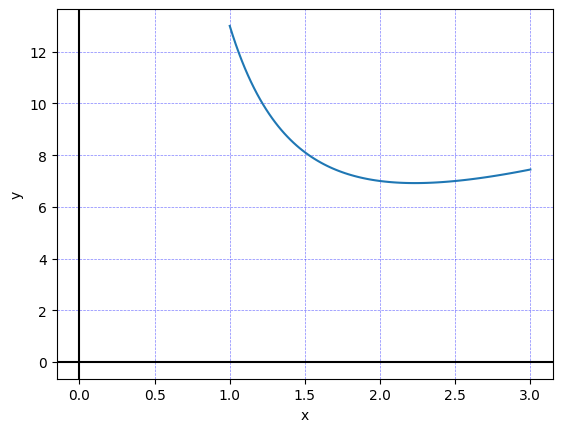

In [3]:
nm.plot_fn_diff(f, x, x_axis=(1, 3, 100))

Z obrazku vidime koren bude len jednoduchy, lebo v okoli bodu x=2 nie su funkcne hodnoty f'(x) blizke nule.

1. Riesenie pomocou **tetivovej metody**.

- f(x) je spojitá na [1.5, 2.5].
- f(x) je monotónna na [1.5, 2.5], buď rastúca alebo klesajúca na celom intervale, kde úlohu
riešime. V našom prípade je f(x) je rastúca.
- na intervale, kde úlohu riešime sa nachádza PRÁVE JEDEN KOREŇ.
- v okolí koreňa je funkcia f(x) spojitá a nemá extrém ani inflexný bod.

Kedze v bode x > 2.5 predpokladame inflexny bod, preto je vhodne volit startovacie body x0 a x1 body mensie ako 2.

In [4]:
nm.tetivova_metoda(f, x, x=[1.0, 1.5], r=50)

     i                x(i)       |x(i+1)-x(i)|
0  0.0  1.0000000000000000  0.5000000000000000
1  1.0  1.5000000000000000  0.4020208077798668
2  2.0  1.9020208077798668  0.1329693906969953
3  3.0  2.0349901984768621  0.0088710147482884
4  4.0  2.0438612132251506  0.0000703650899205
5  5.0  2.0439315783150711  0.0000000267467644
6  6.0  2.0439316050618355  0.0000000000000786

SKUSKA: 0.0000000000000000




2. Riesenie pomocou **Newtonovej metody**.

Na základe separácie koreňov vieme, že na intervale [1.5, 2.5] sa nachádza práve jeden koreň.
Potrebné je overiť splenie podmienok riešiteľnosti
- f(x) je spojitá na [1.5, 2.5]
- f(x) je monotónna na [1.5, 2.5], buď rastúca alebo klesajúca na celom intervale, kde úlohu
riešime. V našom prípade je f(x) je rastúca.
- na intervale, kde úlohu riešime sa nachádza PRÁVE JEDEN KOREŇ.
- v okoli korena existuje derivacia f'(x)

In [5]:
nm.newtonova_metoda(f, x, x=[1])

     i                x(i)       |x(i+1)-x(i)|
0  0.0  1.0000000000000000  0.6923076923076923
1  1.0  1.6923076923076923  0.6923076923076923
2  2.0  2.0296593425061675  0.3373516501984752
3  3.0  2.0439226027637032  0.0142632602575357
4  4.0  2.0439316050585332  0.0000090022948300
5  5.0  2.0439316050619141  0.0000000000033809

SKUSKA: 0.0000000000000000




3. Riesenie pomocou **metody pevenho bodu**.

Pred pouzitim metody treba najst vhodnu iteracnu schemu x(i+1)=g(x(i))

In [6]:
# a) Iteracna schema 1: g(x) = sqrt(10/x-log(x)):
g = sp.sqrt(10/x-sp.log(x))
nm.metoda_pevneho_bodu(f, g, x, x=[2.5], r=20)

# b) Iteracna schema 1: g(x) = e^(10/x-x^2):
g = sp.exp(1)**(10/x-x**2)
nm.metoda_pevneho_bodu(f, g, x, x=[2.5], r=20)

# c) Iteracna schema 1: g(x) = 10/(x**2+ln(x)):
g = 10/(x**2+sp.log(x))
nm.metoda_pevneho_bodu(f, g, x, x=[2.5], r=20)

       i                x(i)       |x(i+1)-x(i)|
0    0.0  2.5000000000000000  0.7439506646663241
1    1.0  1.7560493353336759  0.7439506646663241
2    2.0  2.2652889966754075  0.5092396613417316
3    3.0  1.8965087515243011  0.3687802451511064
4    4.0  2.1524014610896911  0.2558927095653900
5    5.0  1.9696165243650681  0.1827849367246230
6    6.0  2.0974488237632722  0.1278322993982042
7    7.0  2.0067324231350656  0.0907164006282066
8    8.0  2.0704390041401219  0.0637065810050563
9    9.0  2.0253722842705058  0.0450667198696162
10  10.0  2.0570878377085164  0.0317155534380107
11  11.0  2.0346866628817279  0.0224011748267885
12  12.0  2.0504681969149186  0.0157815340331906
13  13.0  2.0393299849836448  0.0111382119312737
14  14.0  2.0471809865980770  0.0078510016144322
15  15.0  2.0416420457605544  0.0055389408375226
16  16.0  2.0455473207626200  0.0039052750020656
17  17.0  2.0427926381072847  0.0027546826553353
18  18.0  2.0447351062281567  0.0019424681208720
19  19.0  2.04336506

<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 + 10/x)
<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return exp(-x**2 

### Nájdite riešenie rovnice **x^2 + x -1 = 0** na intervale **[0.1, 10]**, pomocou **metody pevenho bodu**.

In [7]:
x = sp.Symbol('x')
f = x**2+x-1
nm.plot_single_fn(f, x, x_axis=(-2.5, 2.5, 100))

g = 1-x**2
nm.plot_single_fn(g.diff(x), x, x_axis=(-1, 1, 100))
nm.metoda_pevneho_bodu(f, g, x, x=[-0.5], r=40)

g = 1/(x+1)
nm.plot_single_fn(g.diff(x), x, x_axis=(-1, 1, 100))
nm.metoda_pevneho_bodu(f, g, x, x=[10], r=40)

g = (x-x**2)**(1/3)
nm.plot_single_fn(g.diff(x), x, x_axis=(-1, 1, 100))
nm.metoda_pevneho_bodu(f, g, x, x=[0.8], r=40)

# g = (x/1)-1
# nm.plot_single_fn(g.diff(x), x, x_axis=(-1, 1, 100))
# nm.metoda_pevneho_bodu(f, g, x, x=[0.8], r=40)

# g = sp.sqrt(1-x)
# nm.plot_single_fn(g.diff(x), x, x_axis=(-1, 1, 100))
# nm.metoda_pevneho_bodu(f, g, x, x=[0.85], r=40)

AttributeError: module 'numa' has no attribute 'plot_single_fn'

### Viacnásobný koreň
**Príklad 2:** Numerickými metódami riešte rovnicu **1-x.e^1-x = 0** na intervale **[-2,4]**.

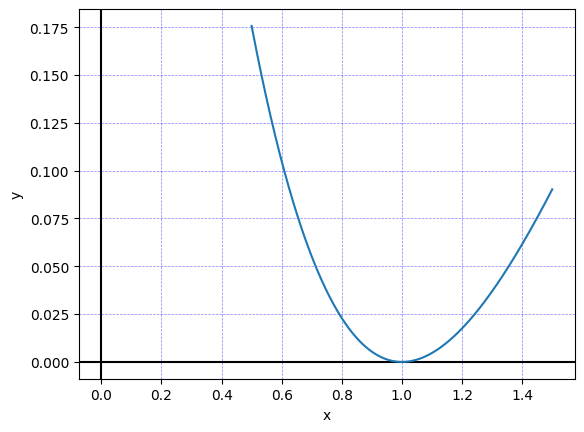

In [9]:
x = sp.Symbol('x')
f = 1-x*sp.exp(1)**(1-x)
nm.plot_fn(f, x, x_axis=(0.5, 1.5, 1000))

Funkcia je na intervale [-2,4] spojitá, konvexná, v okolí bodu x=1 má jeden viacnásobný (pravdepodobne dvojnásobný) koreň.

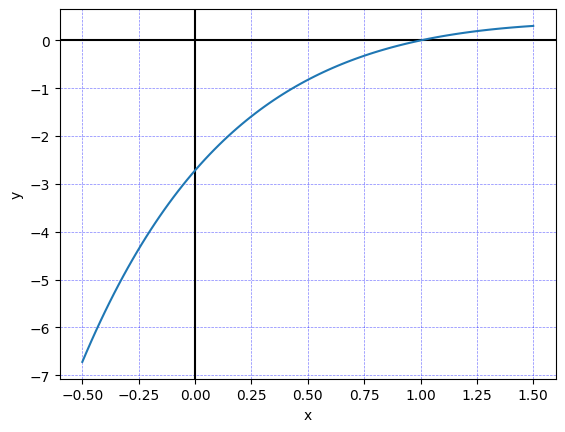

In [10]:
nm.plot_fn_diff(f, x, x_axis=(-0.5, 1.5, 100))

Derivácia funkcie f'(x) je monotónna, v okolí predpokladaného koreňa rastúca, konkávna - to znamená, ze funkcia f(x) má v okolí koreňa x = 1 dvojnásobný koreň.

Podmienky metódy v okolí bodu x = 1 nie sú splnené, napriek tomu sa môžeme pokúsiť metódu použiť -
aby sme mohli porovnať výsledky s metódami, ktoré sú určené na hľadanie viacnásobných koreň

In [11]:
nm.tetivova_metoda(f, x, x=[1.2, 2.0], r=20)

       i                x(i)       |x(i+1)-x(i)|
0    0.0  1.2000000000000000  0.8000000000000000
1    1.0  2.0000000000000000  0.8568198341101763
2    2.0  1.1431801658898237  0.0313341236841480
3    3.0  1.1118460422056757  0.0517683782221199
4    4.0  1.0600776639835559  0.0220370617796648
5    5.0  1.0380406022038910  0.0151148634282494
6    6.0  1.0229257387756416  0.0087585270403983
7    7.0  1.0141672117352434  0.0054623679003099
8    8.0  1.0087048438349335  0.0033324057466362
9    9.0  1.0053724380882973  0.0020577027767388
10  10.0  1.0033147353115586  0.0012675971017904
11  11.0  1.0020471382097682  0.0007826562998114
12  12.0  1.0012644819099568  0.0004832269305428
13  13.0  1.0007812549794139  0.0002985122207013
14  14.0  1.0004827427587126  0.0001844272319527
15  15.0  1.0002983155267600  0.0001139605819140
16  16.0  1.0001843549448459  0.0000704226285129
17  17.0  1.0001139323163331  0.0000435203267599
18  18.0  1.0000704119895731  0.0000268957627918
19  19.0  1.00004351

In [12]:
nm.newtonova_metoda(f, x, x=[1.2], r=20)

       i                x(i)       |x(i+1)-x(i)|
0    0.0  1.2000000000000000  0.1070137908008486
1    1.0  1.0929862091991513  0.1070137908008486
2    2.0  1.0450178993231340  0.0479683098760173
3    3.0  1.0221673452260180  0.0228505540971160
4    4.0  1.0110013181926851  0.0111660270333329
5    5.0  1.0054804319954487  0.0055208861972365
6    6.0  1.0027352032758159  0.0027452287196328
7    7.0  1.0013663538953415  0.0013688493804744
8    8.0  1.0006828656875137  0.0006834882078277
9    9.0  1.0003413551128957  0.0003415105746181
10  10.0  1.0001706581341747  0.0001706969787210
11  11.0  1.0000853242134109  0.0000853339207638
12  12.0  1.0000426608938162  0.0000426633195947
13  13.0  1.0000213301446701  0.0000213307491461
14  14.0  1.0000106649987230  0.0000106651459471
15  15.0  1.0000053324770459  0.0000053325216771
16  16.0  1.0000026662296775  0.0000026662473684
17  17.0  1.0000013331155351  0.0000013331141424
18  18.0  1.0000006665388805  0.0000006665766545
19  19.0  1.00000033

Podmienky metódy v okolí bodu x = 1 sú splnené - funkcia je konvexná, má dvojnásobný koreň v okolí tohto bodu. Zvolíme k = 2.

In [13]:
nm.newton_ralphsonova_metoda(f, x, k=2, x=[1.5], r=20)

     i                x(i)       |x(i+1)-x(i)|
0  0.0  1.5000000000000000  0.5948850828005126
1  1.0  0.9051149171994874  0.5948850828005126
2  2.0  0.9970687994264175  0.0919538822269300
3  3.0  0.9999971381186215  0.0029283386922040
4  4.0  0.9999999999821211  0.0000028618634996
5  5.0  0.9999999999821211  0.0000000000000000

SKUSKA: 0.0000000000000000




### Find Root
https://omz-software.com/pythonista/sympy/modules/mpmath/calculus/optimization.html

In [14]:
from mpmath import *
import numpy as np

# for single root
print(findroot(lambda x: x**2+log(x)-10/x, 1, solver='newton'))
# for multiple roots
# print(findroot(lambda x: x**2+log(x)-10/x, 1, solver='mnewton'))

2.04393160506191


----

### Priklady z cviceni

1. predpis


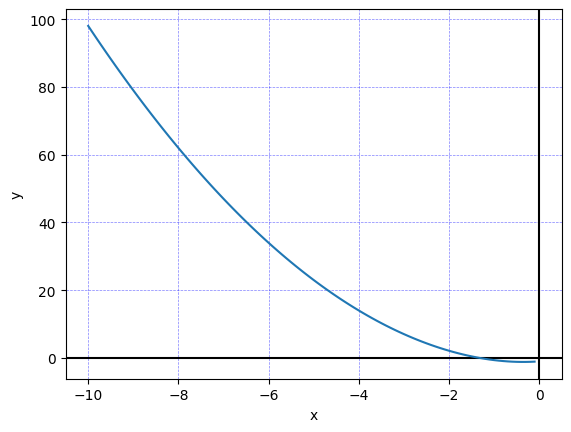

2. separacia korena - monotnna, bez konvexnych bodov, extremov


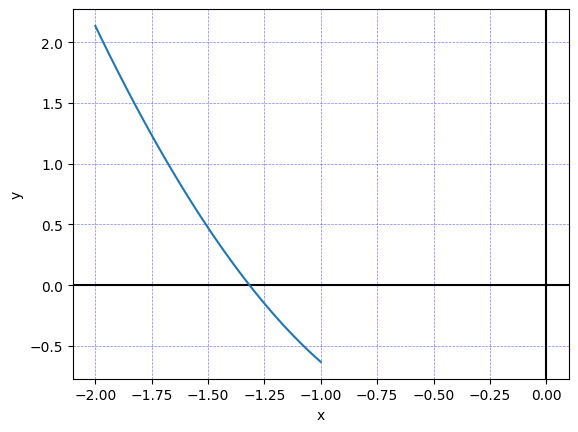

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


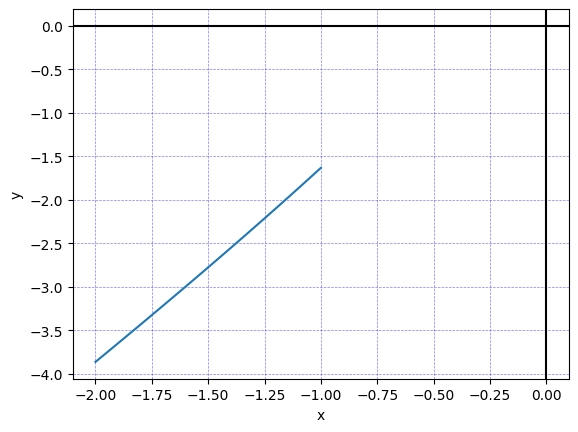

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -1.7500000000000000  0.3716746614428510
1  1.0 -1.3783253385571490  0.3716746614428510
2  2.0 -1.3177256835813873  0.0605996549757617
3  3.0 -1.3159752476945750  0.0017504358868123
4  4.0 -1.3159737777973268  0.0000014698972481
5  5.0 -1.3159737777962901  0.0000000000010367

SKUSKA: -0.0000000000000002


5. FindRoot - Newton
-1.31597377779629


In [15]:
print('1. predpis')
x = sp.Symbol('x')
f = sp.exp(1)**x+x**2-2
nm.plot_fn(f, x, x_axis=(-10, -0.1, 100))

print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-2, -1, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-2, -1, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[-1.75])

print('5. FindRoot - Newton')
print(findroot(lambda x: (exp(x))+(x**2)-2, -1.75, solver='newton'))

# 6. priklad zleho korena


1. predpis


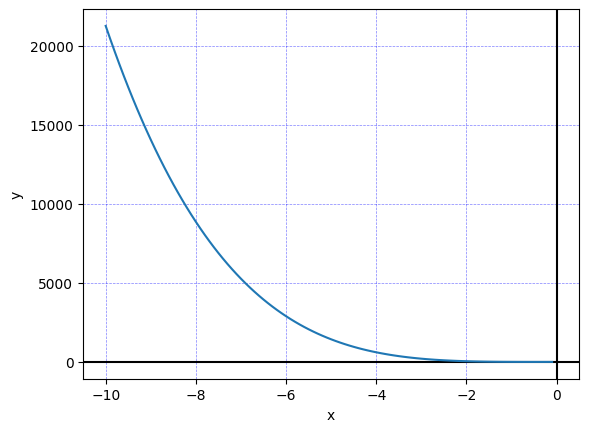

2. separacia korena - monotnna, bez konvexnych bodov, extremov


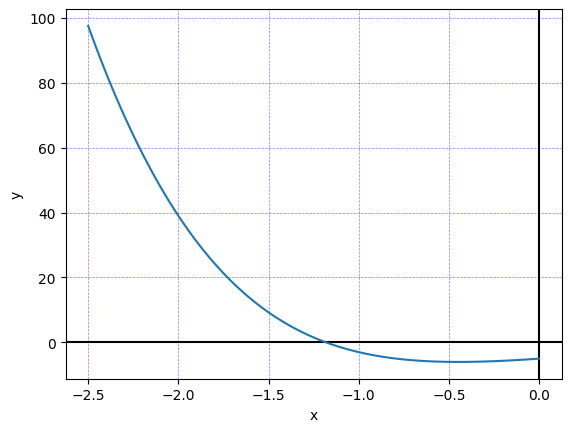

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


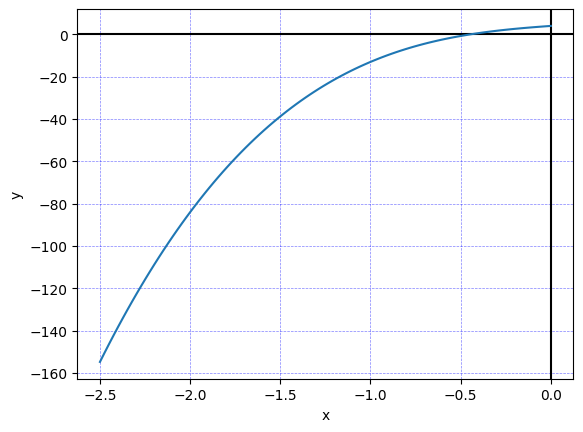

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -2.0000000000000000  0.4642857142857144
1  1.0 -1.5357142857142856  0.4642857142857144
2  2.0 -1.2769311600396918  0.2587831256745938
3  3.0 -1.1903211017681905  0.0866100582715013
4  4.0 -1.1811832622655247  0.0091378395026658
5  5.0 -1.1810874316287958  0.0000958306367289
6  6.0 -1.1810874211732747  0.0000000104555211
7  7.0 -1.1810874211732745  0.0000000000000002

SKUSKA: 0.0000000000000036


4-4.5. Newtonova-Ralphonsonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -2.0000000000000000  0.9285714285714286
1  1.0 -1.0714285714285714  0.9285714285714286
2  2.0 -1.3229875612164430  0.2515589897878716
3  3.0 -1.0775045139414292  0.2454830472750138
4  4.0 -1.3131582076187114  0.2356536936772822
5  5.0 -1.0825925535633141  0.2305656540553973
6  6.0 -1.3051322454428380  0.2225396918795239
7  7.0 -1.0869434598769609  0.2181887855658771
8  8.0 -1.2984138037627031  0.2114703438857422
9  9.0 -1.090725314

In [16]:
print('1. predpis')
x = sp.Symbol('x')
f = 2*x**4-x**3+3*x**2+4*x-5
nm.plot_fn(f, x, x_axis=(-10, -0.1, 100))

print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-2.5, 0, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-2.5, 0, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[-2])

print('4-4.5. Newtonova-Ralphonsonova metoda')
nm.newton_ralphsonova_metoda(f, x, k=2, x=[-2])

print('5. FindRoot - Newton')
print(findroot(lambda x: 2*x**4-x**3+3*x**2+4*x-5, -1.75, solver='mnewton'))

# 6. priklad zleho korena

1. predpis


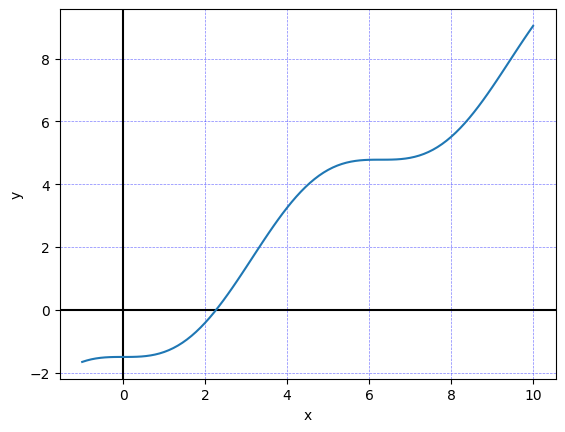

2. separacia korena - monotnna, bez inflexnych bodov, extremov


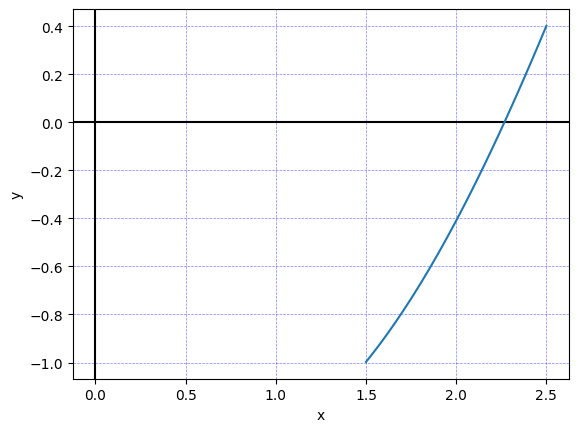

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


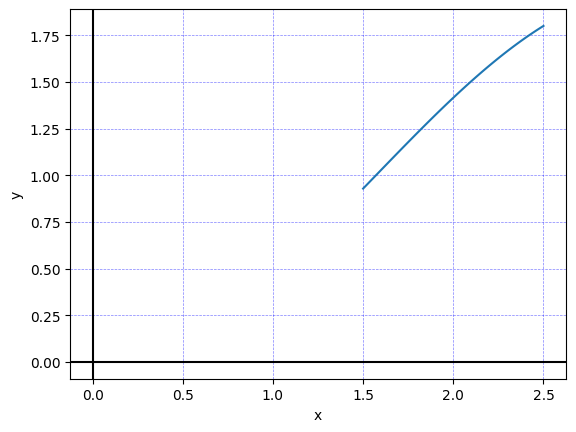

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0  3.0000000000000000  0.6828568420541998
1  1.0  2.3171431579458002  0.6828568420541998
2  2.0  2.2677262721695168  0.0494168857762833
3  3.0  2.2671720804121529  0.0005541917573639
4  4.0  2.2671720086619338  0.0000000717502191
5  5.0  2.2671720086619325  0.0000000000000013

SKUSKA: 0.0000000000000000


5. FindRoot - Newton
2.26717200866193

6. priklad zleho korena
     i  x(i)  |x(i+1)-x(i)|
0  0.0   0.0            inf
1  1.0   inf            inf
2  2.0   NaN            NaN
3  3.0   NaN            NaN
4  4.0   NaN            NaN
5  5.0   NaN            NaN
6  6.0   NaN            NaN
7  7.0   NaN            NaN
8  8.0   NaN            NaN
9  9.0   NaN            NaN

SKUSKA: nan




/home/stephenx/Documents/School/NUMA/numa.py:130: RuntimeWarning: divide by zero encountered in scalar divide
  x_plus_1 = x[i] - (f(x[i]) / d_f(x[i]))
<lambdifygenerated-37>:2: RuntimeWarning: invalid value encountered in sin
  return x - sin(x) - 1.5
<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in cos
  return 1 - cos(x)


In [17]:
print('1. predpis')
x = sp.Symbol('x')
f = x-sp.sin(x)-1.5
nm.plot_fn(f, x, x_axis=(-1, 10, 100))

print('2. separacia korena - monotnna, bez inflexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(1.5, 2.5, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(1.5, 2.5, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[3])

print('5. FindRoot - Newton')
print(findroot(lambda x: x-sin(x)-1.5, 3, solver='newton'))
print()

print('6. priklad zleho korena')
nm.newtonova_metoda(f, x, x=[0])

1. predpis


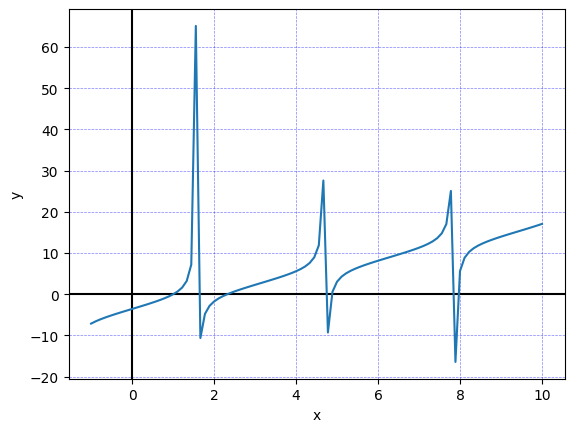

2. separacia korena - monotnna, bez inflexnych bodov, extremov


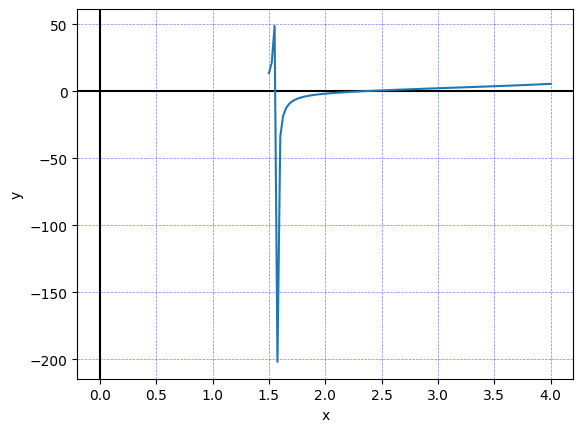

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


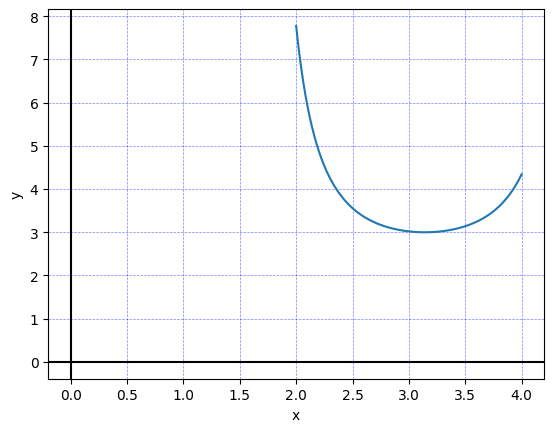

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0  3.5000000000000000  1.2019769861194094
1  1.0  2.2980230138805906  1.2019769861194094
2  2.0  2.3279647014965641  0.0299416876159735
3  3.0  2.3284953840383742  0.0005306825418101
4  4.0  2.3284955373364906  0.0000001532981164
5  5.0  2.3284955373365035  0.0000000000000129

SKUSKA: 0.0000000000000000


5. FindRoot - Newton
2.3284955373365

6. priklad zleho korena
     i                x(i)       |x(i+1)-x(i)|
0  0.0  1.5500000000000000  0.0205563406393807
1  1.0  1.5294436593606193  0.0205563406393807
2  2.0  1.4892004744405283  0.0402431849200910
3  3.0  1.4131066685545102  0.0760938058860181
4  4.0  1.2834928731463955  0.1296137954081147
5  5.0  1.1208136771010317  0.1626791960453637
6  6.0  1.0231080573495961  0.0977056197514357
7  7.0  1.0080324486014216  0.0150756087481745
8  8.0  1.0077899159168924  0.0002425326845292
9  9.0  1.0077898564928587  0.0000000594240337

SKUSKA: 0.0000000000000004




In [18]:
print('1. predpis')
x = sp.Symbol('x')
f = 2*x+sp.tan(x)-3.6
nm.plot_fn(f, x, x_axis=(-1, 10, 100))

print('2. separacia korena - monotnna, bez inflexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(1.5, 4, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(2, 4, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[3.5])

print('5. FindRoot - Newton')
print(findroot(lambda x: 2*x+tan(x)-3.6, 3.5, solver='newton'))
print()

print('6. priklad zleho korena')
nm.newtonova_metoda(f, x, x=[1.55])

1. predpis


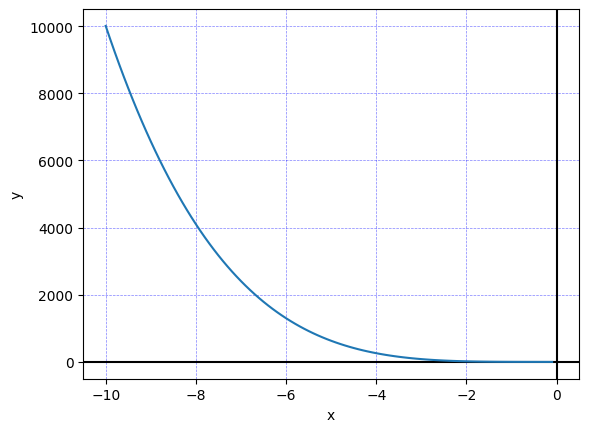

2. separacia korena - monotnna, bez konvexnych bodov, extremov


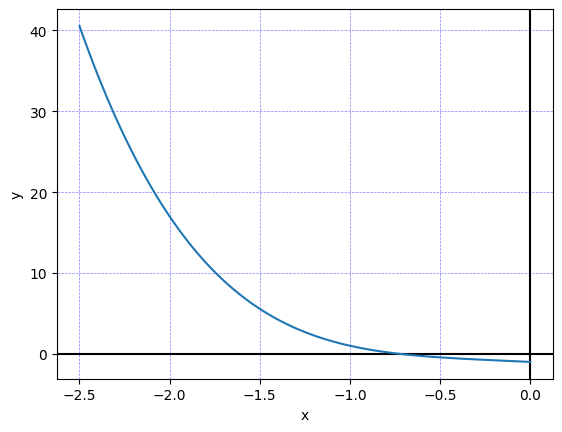

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


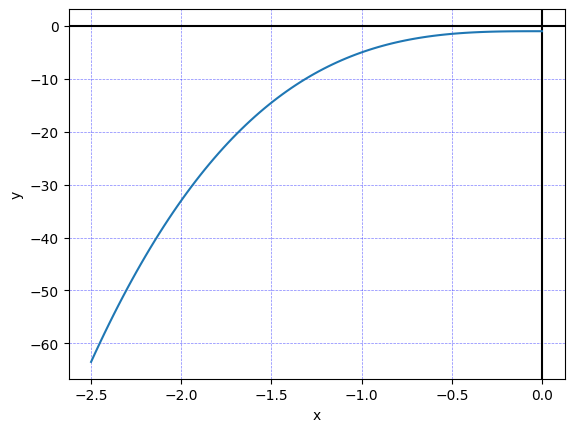

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -2.0000000000000000  0.5151515151515151
1  1.0 -1.4848484848484849  0.5151515151515151
2  2.0 -1.1055742038165690  0.3792742810319158
3  3.0 -0.8558488900431862  0.2497253137733828
4  4.0 -0.7439842430177885  0.1118646470253977
5  5.0 -0.7249603540564065  0.0190238889613821
6  6.0 -0.7244922329794669  0.0004681210769396
7  7.0 -0.7244919590006094  0.0000002739788575
8  8.0 -0.7244919590005157  0.0000000000000937

SKUSKA: 0.0000000000000000


4-4.5. Newtonova-Ralphonsonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -2.0000000000000000  1.0303030303030303
1  1.0 -0.9696969696969697  1.0303030303030303
2  2.0 -0.6022194049785378  0.3674775647184320
3  3.0 -0.8864305991080903  0.2842111941295525
4  4.0 -0.6202726754724958  0.2661579236355945
5  5.0 -0.8573619653120306  0.2370892898395348
6  6.0 -0.6314588429002901  0.2259031224117405
7  7.0 -0.8402594966204250  0.2088006537201349
8  8.0 -0.639402712

In [19]:
print('1. predpis')
x = sp.Symbol('x')
f = x**4-x-1
nm.plot_fn(f, x, x_axis=(-10, -0.1, 100))

print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-2.5, 0, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-2.5, 0, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[-2])

print('4-4.5. Newtonova-Ralphonsonova metoda')
nm.newton_ralphsonova_metoda(f, x, k=2, x=[-2])

print('5. FindRoot - Newton')
print(findroot(lambda x: x**4-x-1 , -2, solver='mnewton'))

# 6. priklad zleho korena

1. predpis


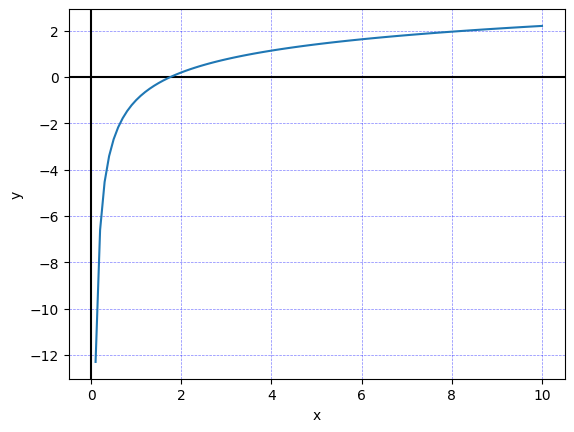

2. separacia korena - monotnna, bez konvexnych bodov, extremov


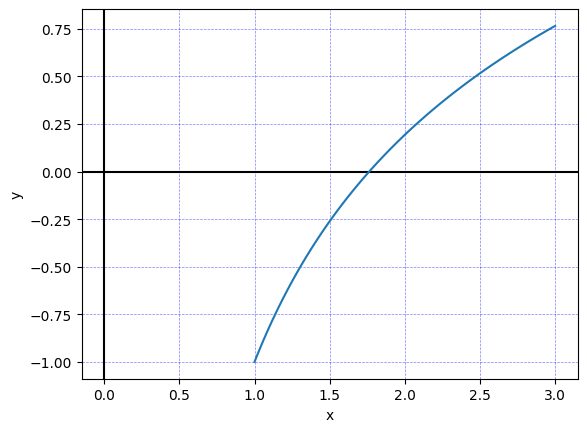

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


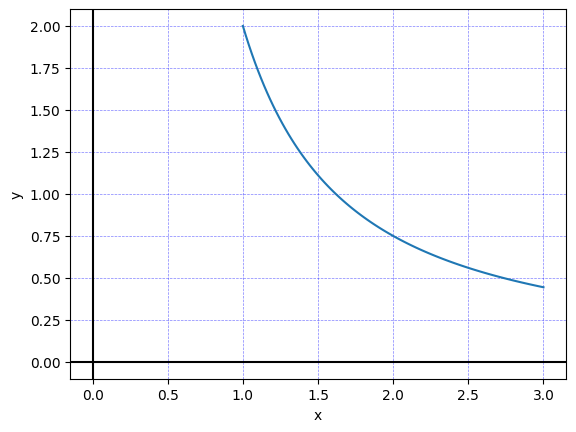

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0  3.0000000000000000  1.7218776495032473
1  1.0  1.2781223504967527  1.7218776495032473
2  2.0  1.6631985233356095  0.3850761728388568
3  3.0  1.7592859551699203  0.0960874318343108
4  4.0  1.7632168443489422  0.0039308891790220
5  5.0  1.7632228343380398  0.0000059899890976
6  6.0  1.7632228343518968  0.0000000000138569

SKUSKA: -0.0000000000000002


5. FindRoot - Newton
1.7632228343519
6. priklad zleho korena - oblast pomaleho rastu
     i                 x(i)        |x(i+1)-x(i)|
0  0.0  30.0000000000000000  97.7766981772883952
1  1.0 -67.7766981772883952  97.7766981772883952
2  2.0                  NaN                  NaN
3  3.0                  NaN                  NaN
4  4.0                  NaN                  NaN
5  5.0                  NaN                  NaN
6  6.0                  NaN                  NaN
7  7.0                  NaN                  NaN
8  8.0                  NaN                  Na

<lambdifygenerated-58>:2: RuntimeWarning: invalid value encountered in log
  return log(x) - 1/x


In [20]:
print('1. predpis')
x = sp.Symbol('x')
f = sp.log(x)-1/x
nm.plot_fn(f, x, x_axis=(0.1, 10, 100))

print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(1, 3, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(1, 3, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[3])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=2, x=[-2])

print('5. FindRoot - Newton')
print(findroot(lambda x: log(x)-1/x , 3, solver='newton'))

print('6. priklad zleho korena - oblast pomaleho rastu')
nm.newtonova_metoda(f, x, x=[30])

1. predpis


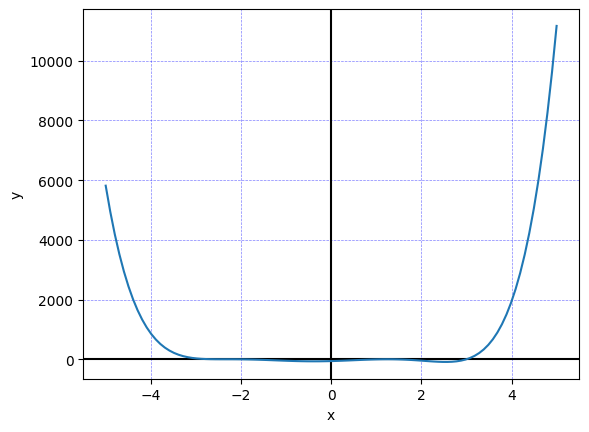

2. separacia korena - monotnna, bez konvexnych bodov, extremov


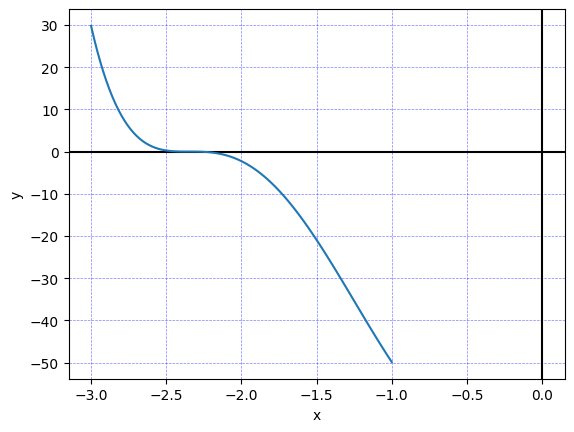

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


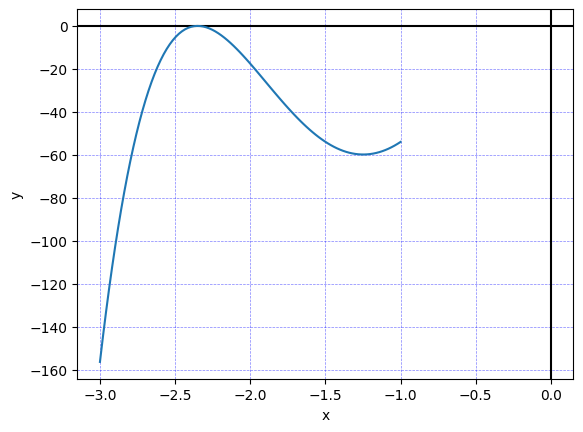

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -2.0000000000000000  0.1288959744918285
1  1.0 -2.1288959744918285  0.1288959744918285
2  2.0 -2.2070487913420713  0.0781528168502428
3  3.0 -2.2563144106191766  0.0492656192771053
4  4.0 -2.2878405675790394  0.0315261569598628
5  5.0 -2.3078481649433158  0.0200075973642764
6  6.0 -2.3197980518346681  0.0119498868913523
7  7.0 -2.3255808848885611  0.0057828330538929
8  8.0 -2.3271259301214617  0.0015450452329007
9  9.0 -2.3272326302196173  0.0001067000981556

SKUSKA: -0.0000000000010374


4-4.5. Newtonova-Ralphonsonova metoda
       i                x(i)       |x(i+1)-x(i)|
0    0.0 -2.0000000000000000  0.2577919489836575
1    1.0 -2.2577919489836575  0.2577919489836575
2    2.0 -2.3197810366049962  0.0619890876213387
3    3.0 -2.3313679556648195  0.0115869190598232
4    4.0 -2.3211754508130191  0.0101925048518003
5    5.0 -2.3309633813509274  0.0097879305379083
6    6.0 -2.3219826497848692  0.0089807315660582
7 

In [21]:
print('1. predpis')
x = sp.Symbol('x')
f = -60.8338 + 39.9518*x + 45.7178*x**2 - 18.9403*x**3 - 13.145*x**4 + 1.55*x**5 + x**6
nm.plot_fn(f, x, x_axis=(-5, 5, 100))

print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-1, -3, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-1, -3, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[-2])

print('4-4.5. Newtonova-Ralphonsonova metoda')
nm.newton_ralphsonova_metoda(f, x, k=2, x=[-2], r=50)

print('5. FindRoot - Newton')
print(findroot(lambda x: -60.8338 + 39.9518*x + 45.7178*x**2 - 18.9403*x**3 - 13.145*x**4 + 1.55*x**5 + x**6 , -2, solver='mnewton'))

# print('6. priklad zleho korena - oblast pomaleho rastu')
# nm.newtonova_metoda(f, x, x=[30])

1. predpis


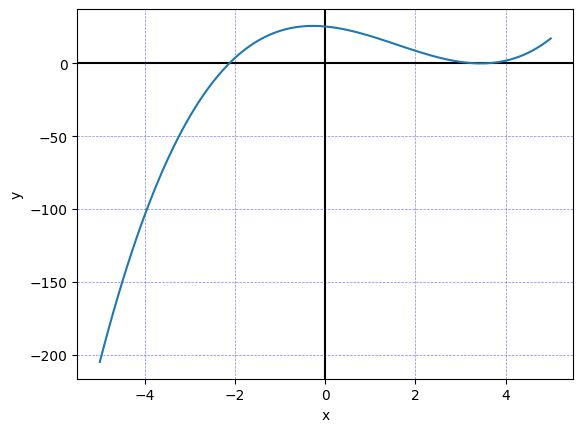

2. separacia korena - monotnna, bez konvexnych bodov, extremov


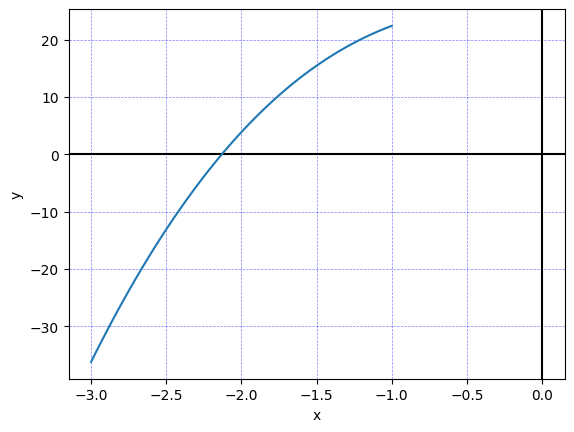

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


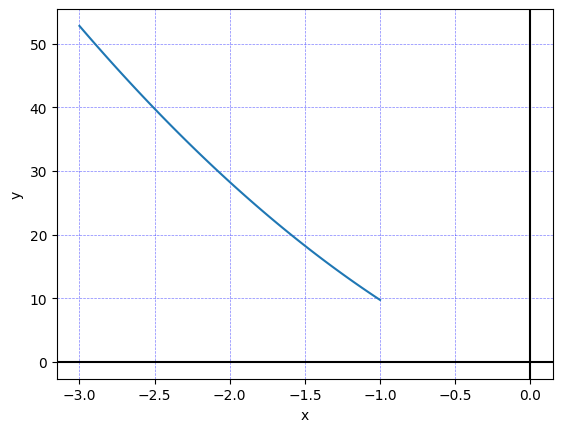

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -2.0000000000000000  0.1365116402396986
1  1.0 -2.1365116402396986  0.1365116402396986
2  2.0 -2.1300143454508000  0.0064972947888986
3  3.0 -2.1299991971632464  0.0000151482875537
4  4.0 -2.1299991970809988  0.0000000000822475

SKUSKA: -0.0000000000000036


5. FindRoot - Newton
-2.129999197081
2. separacia korena - monotnna, bez konvexnych bodov, extremov


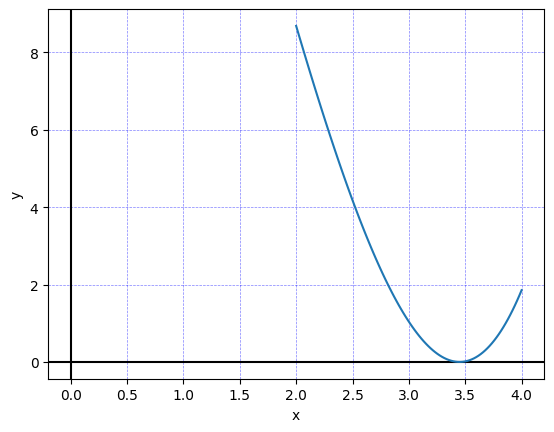

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


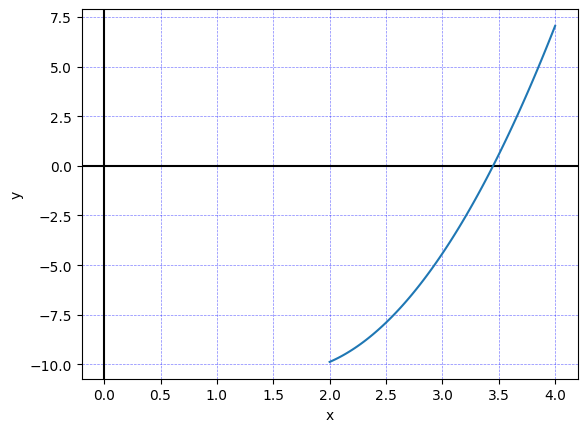

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0  3.0000000000000000  0.4285953474404978
1  1.0  3.4285953474404978  0.4285953474404978
2  2.0  3.4495448498870180  0.0209495024465203
3  3.0  3.4491298795391878  0.0004149703478302
4  4.0  3.4485111751029400  0.0006187044362478
5  5.0  3.4480076326677271  0.0005035424352129
6  6.0  3.4478868229925688  0.0001208096751584
7  7.0  3.4478829331518295  0.0000038898407393
8  8.0  3.4478829295667768  0.0000000035850527
9  9.0  3.4478829295670779  0.0000000000003011

SKUSKA: -0.0000000000003009


5. FindRoot - Newton
3.44788292956697


In [22]:
print('1. predpis')
x = sp.Symbol('x')
f = 25.3523 - 2.7945*x - 4.77*x**2 + x**3
nm.plot_fn(f, x, x_axis=(-5, 5, 100))

# vypocet jednoducheho korena
print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-1, -3, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-1, -3, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[-2])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=2, x=[-2], r=50)

print('5. FindRoot - Newton')
print(findroot(lambda x: 25.3523 - 2.7945*x - 4.77*x**2 + x**3, -2, solver='newton'))

# vypocet nasobneho korena
print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(2, 4, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(2, 4, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f/f.diff(x), x, x=[3])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=2, x=[2])

print('5. FindRoot - Newton')
print(findroot(lambda x: 25.3523 - 2.7945*x - 4.77*x**2 + x**3, 3, solver='mnewton'))

# print('6. priklad zleho korena - oblast pomaleho rastu')
# nm.newtonova_metoda(f, x, x=[30])

1. predpis


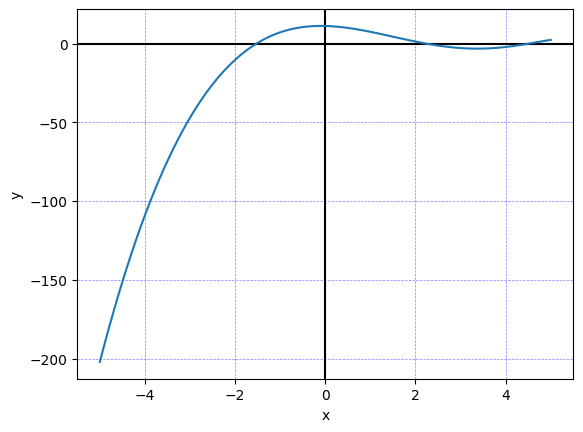

2. separacia korena - monotnna, bez konvexnych bodov, extremov


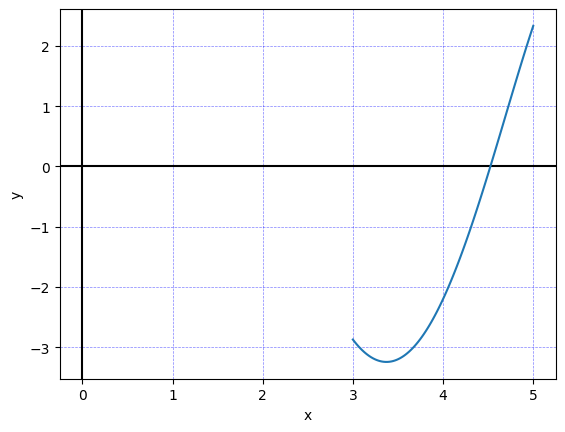

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


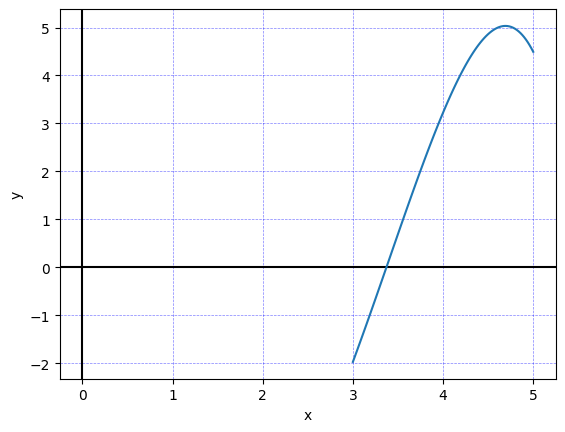

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0  4.0000000000000000  0.6821760824184837
1  1.0  4.6821760824184837  0.6821760824184837
2  2.0  4.5261691981087466  0.1560068843097371
3  3.0  4.5247064407947448  0.0014627573140018
4  4.0  4.5247061117200023  0.0000003290747426
5  5.0  4.5247061117199845  0.0000000000000178

SKUSKA: 0.0000000000000089


5. FindRoot - Newton
4.52470611171999


In [23]:
print('1. predpis')
x = sp.Symbol('x')
f = 12.1489 - 2.1465**x - 3.57*x**2 + x**3
nm.plot_fn(f, x, x_axis=(-5, 5, 100))

# vypocet nasobneho korena
print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(3, 5, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(3, 5, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f, x, x=[4])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=2, x=[-2], r=50)

print('5. FindRoot - Newton')
print(findroot(lambda x: 12.1489 - 2.1465**x - 3.57*x**2 + x**3, 4, solver='newton'))

# print('6. priklad zleho korena - oblast pomaleho rastu')
# nm.newtonova_metoda(f, x, x=[30])

1. predpis


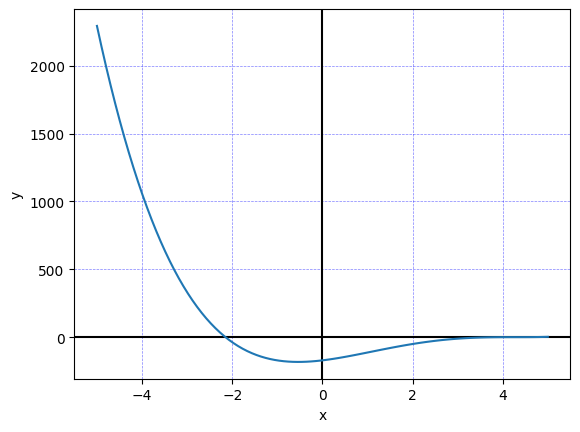

2. separacia korena - monotnna, bez konvexnych bodov, extremov


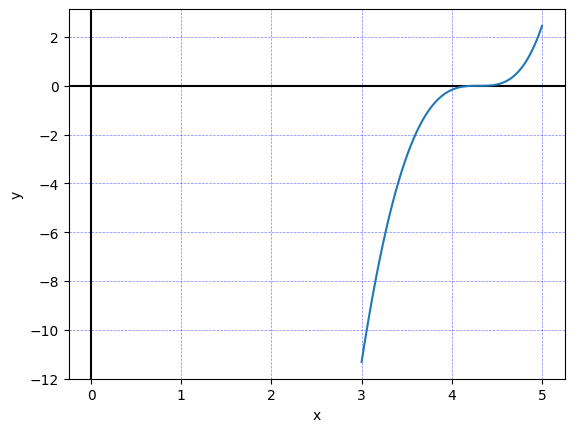

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


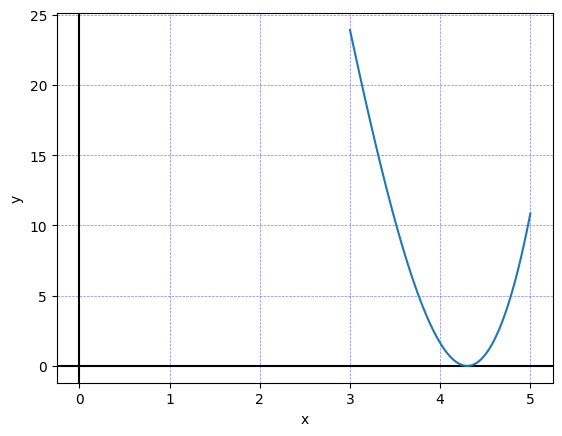

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0  3.0000000000000000  0.5365449798315036
1  1.0  3.5365449798315036  0.5365449798315036
2  2.0  3.8874050468848225  0.3508600670533188
3  3.0  4.0858909797441285  0.1984859328593060
4  4.0  4.1908874960693634  0.1049965163252349
5  5.0  4.2444783939050064  0.0535908978356430
6  6.0  4.2702779522384535  0.0257995583334472
7  7.0  4.2793735064507130  0.0090955542122595
8  8.0  4.2801875871064796  0.0008140806557666
9  9.0  4.2801885879308106  0.0000010008243310

SKUSKA: 0.0000000000001119


5. FindRoot - Newton
4.28018858792504


In [24]:
print('1. predpis')
x = sp.Symbol('x')
f = -170.94 + 39.7535*x + 27.735*x**2 - 10.75*x**3 + x**4
nm.plot_fn(f, x, x_axis=(-5, 5, 100))

# vypocet nasobneho korena
print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(3, 5, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(3, 5, 100))

print('4. Newtonova metoda')
a = f.diff(x)
nm.newtonova_metoda(f/a.diff(x), x, x=[3])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=2, x=[3])

print('5. FindRoot - Newton')
print(findroot(lambda x: -170.94 + 39.7535*x + 27.735*x**2 - 10.75*x**3 + x**4, 3, solver='mnewton'))

# print('6. priklad zleho korena - oblast pomaleho rastu')
# nm.newtonova_metoda(f, x, x=[30])

1. predpis


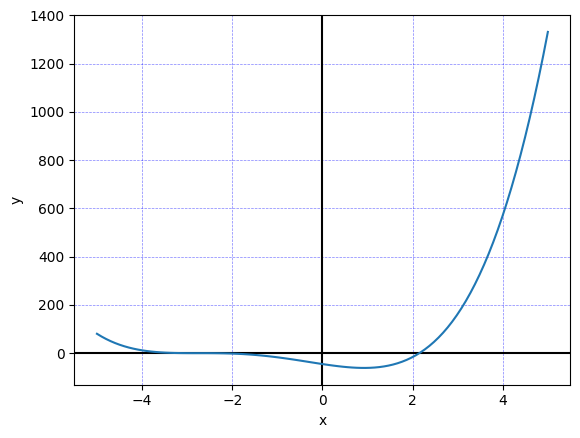

2. separacia korena - monotnna, bez konvexnych bodov, extremov


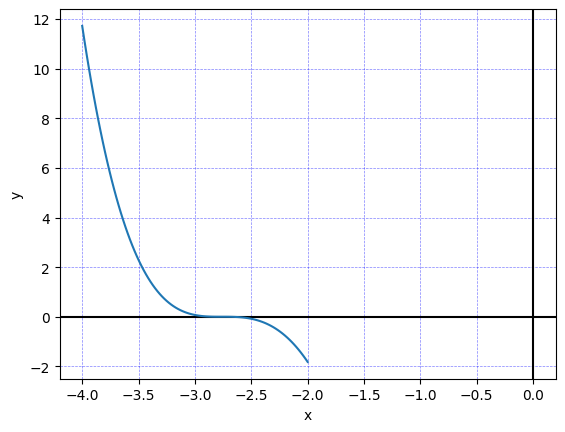

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


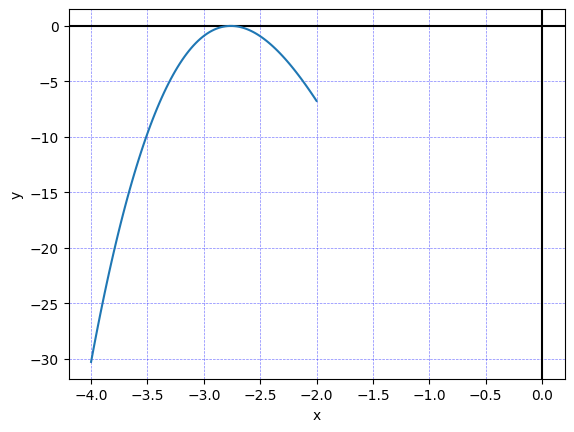

4. Newtonova metoda
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -4.0000000000000000  1.3056051694471380
1  1.0 -2.6943948305528620  1.3056051694471380
2  2.0 -2.7728799516740623  0.0784851211212003
3  3.0 -2.7781062102551837  0.0052262585811214
4  4.0 -2.7831101983092612  0.0050039880540775
5  5.0 -2.7854516772365727  0.0023414789273115
6  6.0 -2.7857365777484460  0.0002849005118732
7  7.0 -2.7857398536559188  0.0000032759074728
8  8.0 -2.7857398540727987  0.0000000004168799

SKUSKA: -0.0000000000007263


5. FindRoot - Newton
-2.78573985407404


In [25]:
print('1. predpis')
x = sp.Symbol('x')
f = -45.2028 - 28.1089*x + 5.0508*x**2 + 6.13*x**3 + x**4
nm.plot_fn(f, x, x_axis=(-5, 5, 100))

# vypocet nasobneho korena
print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-2, -4, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-2, -4, 100))

print('4. Newtonova metoda')
nm.newtonova_metoda(f/f.diff(x), x, x=[-4])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=3, x=[-4])

print('5. FindRoot - Newton')
print(findroot(lambda x: -45.2028 - 28.1089*x + 5.0508*x**2 + 6.13*x**3 + x**4, -4, solver='mnewton'))

# print('6. priklad zleho korena - oblast pomaleho rastu')
# nm.newtonova_metoda(f, x, x=[30])

1. predpis


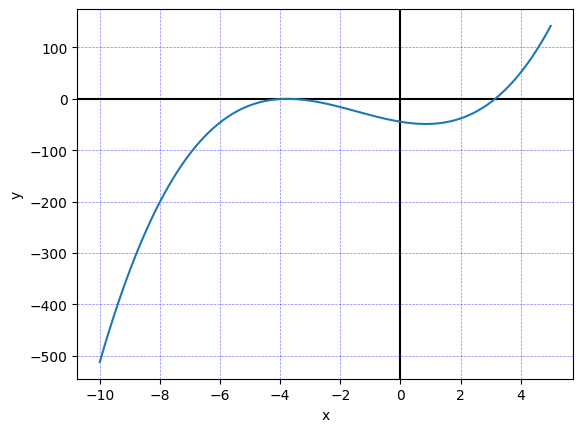

2. separacia korena - monotnna, bez konvexnych bodov, extremov


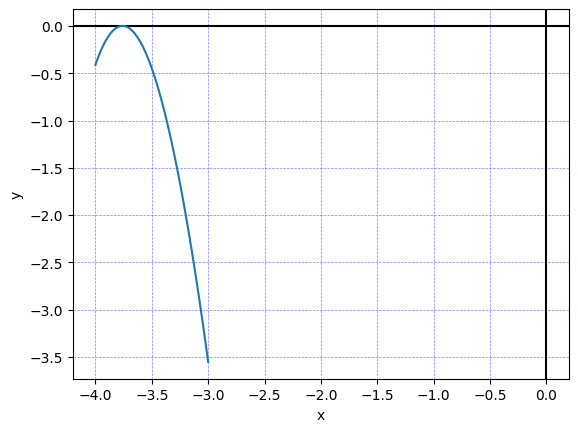

3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0


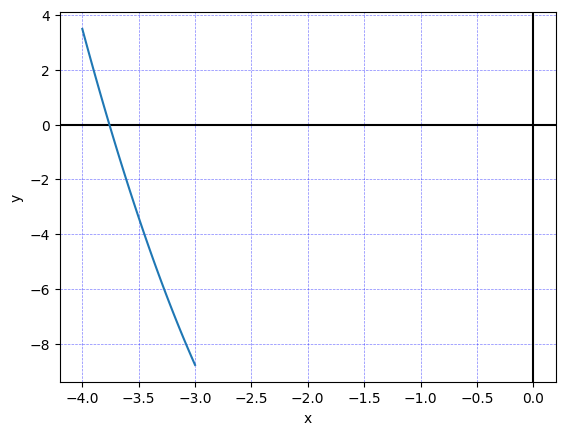

4. Newtonova metoda - substitucia
     i                x(i)       |x(i+1)-x(i)|
0  0.0 -3.0000000000000000  0.7076234456826782
1  1.0 -3.7076234456826782  0.7076234456826782
2  2.0 -3.7595787441613120  0.0519552984786338
3  3.0 -3.7591825115337079  0.0003962326276041
4  4.0 -3.7585341229801705  0.0006483885535373
5  5.0 -3.7578616536166507  0.0006724693635198
6  6.0 -3.7576102832679803  0.0002513703486704
7  7.0 -3.7575936648762513  0.0000166183917290
8  8.0 -3.7575936067198410  0.0000000581564104
9  9.0 -3.7575936067191997  0.0000000000006413

SKUSKA: -0.0000000000000000


5. FindRoot - Newton
-3.75759360671939


In [26]:
print('1. predpis')
x = sp.Symbol('x')
f = -44.5334 - 9.5504*x + 4.37*x**2 + x**3
nm.plot_fn(f, x, x_axis=(-10, 5, 100))

# vypocet nasobneho korena
print('2. separacia korena - monotnna, bez konvexnych bodov, extremov')
nm.plot_fn(f, x, x_axis=(-3, -4, 100))

print('3. predpoklad pre Newtonovu metodu - derivacia nemoze byt na intervali blizka 0')
nm.plot_fn_diff(f, x, x_axis=(-3, -4, 100))

print('4. Newtonova metoda - substitucia')
nm.newtonova_metoda(f/f.diff(x), x, x=[-3])

# print('4-4.5. Newtonova-Ralphonsonova metoda')
# nm.newton_ralphsonova_metoda(f, x, k=2, x=[-3])

print('5. FindRoot - Newton')
print(findroot(lambda x: -44.5334 - 9.5504*x + 4.37*x**2 + x**3, -2, solver='newton'))

# print('6. priklad zleho korena - oblast pomaleho rastu')
# nm.newtonova_metoda(f, x, x=[30])